# Sprint 9
## Tasca M9 T01

In [1]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.corpus import stopwords

from nltk.tokenize import sent_tokenize, word_tokenize, WordPunctTokenizer, regexp_tokenize, RegexpTokenizer

from nltk.probability import FreqDist

from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from nltk.sentiment.vader import SentimentIntensityAnalyzer

import warnings
#warnings.filterwarnings(action='once')
warnings.filterwarnings('ignore')

#nltk.download('all')

## Example amazon reviews

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/pycaret/pycaret/master/datasets/amazon.csv')

df

,reviewText,Positive
0,This is a one of the best apps acording to a b...,1
1,This is a pretty good version of the game for ...,1
2,this is a really cool game. there are a bunch ...,1
3,"This is a silly game and can be frustrating, b...",1
4,This is a terrific game on any pad. Hrs of fun...,1
...,...,...
19995,this app is fricken stupid.it froze on the kin...,0
19996,Please add me!!!!! I need neighbors! Ginger101...,1
19997,love it! this game. is awesome. wish it had m...,1
19998,I love love love this app on my side of fashio...,1


In [3]:
# create preprocess_text function
def preprocess_text(text):

    # Tokenize the text

    tokens = word_tokenize(text.lower())
    
    # Remove stop words

    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]

    # Lemmatize the tokens

    lemmatizer = WordNetLemmatizer()

    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

    # Join the tokens back into a string

    processed_text = ' '.join(lemmatized_tokens)
    
    return processed_text

# apply the function df

df['reviewText'] = df['reviewText'].apply(preprocess_text)
df

,reviewText,Positive
0,one best apps acording bunch people agree bomb...,1
1,pretty good version game free . lot different ...,1
2,really cool game . bunch level find golden egg...,1
3,"silly game frustrating , lot fun definitely re...",1
4,terrific game pad . hr fun . grandkids love . ...,1
...,...,...
19995,app fricken stupid.it froze kindle wont allow ...,0
19996,please add ! ! ! ! ! need neighbor ! ginger101...,1
19997,love ! game . awesome . wish free stuff house ...,1
19998,love love love app side fashion story fight wo...,1


In [4]:
# initialize NLTK sentiment analyzer

analyzer = SentimentIntensityAnalyzer()

# create get_sentiment function

def get_sentiment(text):

    scores = analyzer.polarity_scores(text)

    sentiment = 1 if scores['pos'] > 0 else 0

    return sentiment

# apply get_sentiment function

df['sentiment'] = df['reviewText'].apply(get_sentiment)

df

,reviewText,Positive,sentiment
0,one best apps acording bunch people agree bomb...,1,1
1,pretty good version game free . lot different ...,1,1
2,really cool game . bunch level find golden egg...,1,1
3,"silly game frustrating , lot fun definitely re...",1,1
4,terrific game pad . hr fun . grandkids love . ...,1,1
...,...,...,...
19995,app fricken stupid.it froze kindle wont allow ...,0,0
19996,please add ! ! ! ! ! need neighbor ! ginger101...,1,1
19997,love ! game . awesome . wish free stuff house ...,1,1
19998,love love love app side fashion story fight wo...,1,1


In [5]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(df['Positive'], df['sentiment']))

[[ 1131  3636]
 [  576 14657]]


In [6]:
from sklearn.metrics import classification_report

print(classification_report(df['Positive'], df['sentiment']))

              precision    recall  f1-score   support

           0       0.66      0.24      0.35      4767
           1       0.80      0.96      0.87     15233

    accuracy                           0.79     20000
   macro avg       0.73      0.60      0.61     20000
weighted avg       0.77      0.79      0.75     20000



## Exercici 1

Agafa un text en anglès que vulguis, i calcula'n la freqüència de les paraules.

- He decidit agafar un text sobre els beneficis de la IA, generat per ChatGPT-3 i també unes reviews positives i negatives de Twitter per fer un anàlisis posterior.

In [7]:
text_IA= """ Artificial intelligence (AI) has the potential to revolutionize the way we live and work, and many experts believe that it will be one of the most significant technological advancements of the 21st century. There are several reasons why AI is viewed in a positive light.

Firstly, AI has the potential to improve efficiency and productivity in numerous industries. By automating tasks that were previously done manually, businesses can save time and resources, allowing them to focus on more important tasks. For example, in the healthcare industry, AI-powered systems can help doctors and nurses make more accurate diagnoses, leading to better patient outcomes.

Secondly, AI has the potential to create new industries and job opportunities. As AI technology continues to advance, new products and services will emerge, creating jobs for developers, engineers, and other professionals. In addition, the use of AI can free up workers to focus on more creative and higher-level tasks that require human skills and judgment.

Thirdly, AI has the potential to improve safety and security in various contexts. For instance, self-driving cars equipped with AI can help prevent accidents caused by human error. AI-powered security systems can also help detect and prevent crime in public places, making cities safer for residents.

Finally, AI has the potential to help solve some of the world's most pressing challenges, such as climate change and disease outbreaks. By analyzing vast amounts of data and identifying patterns, AI can help researchers develop new treatments, predict the spread of diseases, and improve environmental sustainability.

In conclusion, AI has enormous potential to improve our lives in numerous ways. While there are certainly challenges associated with the use of AI, the benefits outweigh the risks, and it is important that we continue to invest in this technology to unlock its full potential. """

print(text_IA)

 Artificial intelligence (AI) has the potential to revolutionize the way we live and work, and many experts believe that it will be one of the most significant technological advancements of the 21st century. There are several reasons why AI is viewed in a positive light.

Firstly, AI has the potential to improve efficiency and productivity in numerous industries. By automating tasks that were previously done manually, businesses can save time and resources, allowing them to focus on more important tasks. For example, in the healthcare industry, AI-powered systems can help doctors and nurses make more accurate diagnoses, leading to better patient outcomes.

Secondly, AI has the potential to create new industries and job opportunities. As AI technology continues to advance, new products and services will emerge, creating jobs for developers, engineers, and other professionals. In addition, the use of AI can free up workers to focus on more creative and higher-level tasks that require hum

In [8]:
tokens = nltk.word_tokenize(text_IA.lower())
print('\033[1m','Tokens:','\033[0m',tokens[:10])

tagged = nltk.pos_tag(tokens)
print('\033[1m','\nTagged tokens:','\033[0m',tagged[:10])

fdist = FreqDist(tokens)
print('\033[1m','\nParaules més comuns al text:')
fdist.most_common(15)

 Tokens:  ['artificial', 'intelligence', '(', 'ai', ')', 'has', 'the', 'potential', 'to', 'revolutionize']
 
Tagged tokens:  [('artificial', 'JJ'), ('intelligence', 'NN'), ('(', '('), ('ai', 'NN'), (')', ')'), ('has', 'VBZ'), ('the', 'DT'), ('potential', 'JJ'), ('to', 'TO'), ('revolutionize', 'VB')]
 
Paraules més comuns al text:


[(',', 24),
 ('and', 16),
 ('the', 15),
 ('.', 15),
 ('ai', 12),
 ('to', 12),
 ('in', 9),
 ('potential', 7),
 ('of', 7),
 ('has', 6),
 ('can', 6),
 ('help', 5),
 ('that', 4),
 ('improve', 4),
 ('for', 4)]

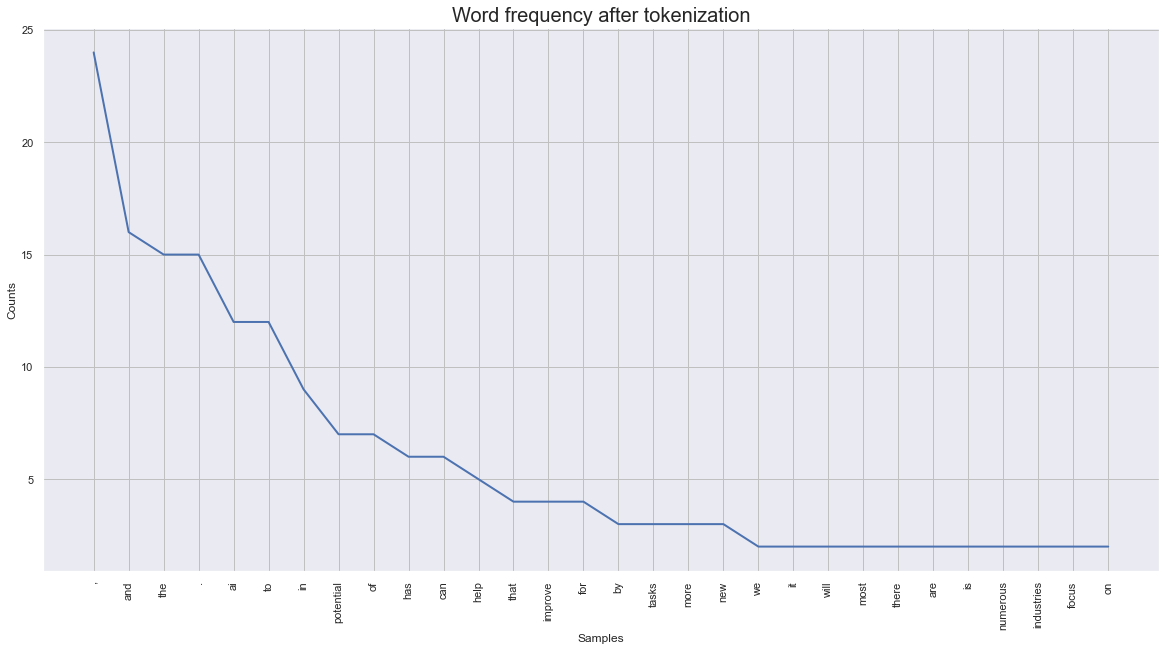

In [9]:
# Frequency words Distribution Plot
sns.set_theme(style='darkgrid', palette='deep')

plt.subplots(figsize=(20,10))
plt.title('Word frequency after tokenization',fontsize=20)
fdist.plot(30,cumulative=False)
plt.show()

## Exercici 2

Treu les stopwords i realitza stemming al teu conjunt de dades.

In [10]:
# Regex Tokens
stokr = regexp_tokenize(text_IA.lower(), "[\w']+")
print('\033[1m','Regexp Tokenized:')
display(stokr[:15])

filtered_tokens = [token for token in stokr if token not in stopwords.words('english')]
print('\033[1m','Without Stopwords:')
display(filtered_tokens[:15])

lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
print('\033[1m','Lemmatized:')
display(lemmatized_tokens[:15])

 Regexp Tokenized:


['artificial',
 'intelligence',
 'ai',
 'has',
 'the',
 'potential',
 'to',
 'revolutionize',
 'the',
 'way',
 'we',
 'live',
 'and',
 'work',
 'and']

 Without Stopwords:


['artificial',
 'intelligence',
 'ai',
 'potential',
 'revolutionize',
 'way',
 'live',
 'work',
 'many',
 'experts',
 'believe',
 'one',
 'significant',
 'technological',
 'advancements']

 Lemmatized:


['artificial',
 'intelligence',
 'ai',
 'potential',
 'revolutionize',
 'way',
 'live',
 'work',
 'many',
 'expert',
 'believe',
 'one',
 'significant',
 'technological',
 'advancement']

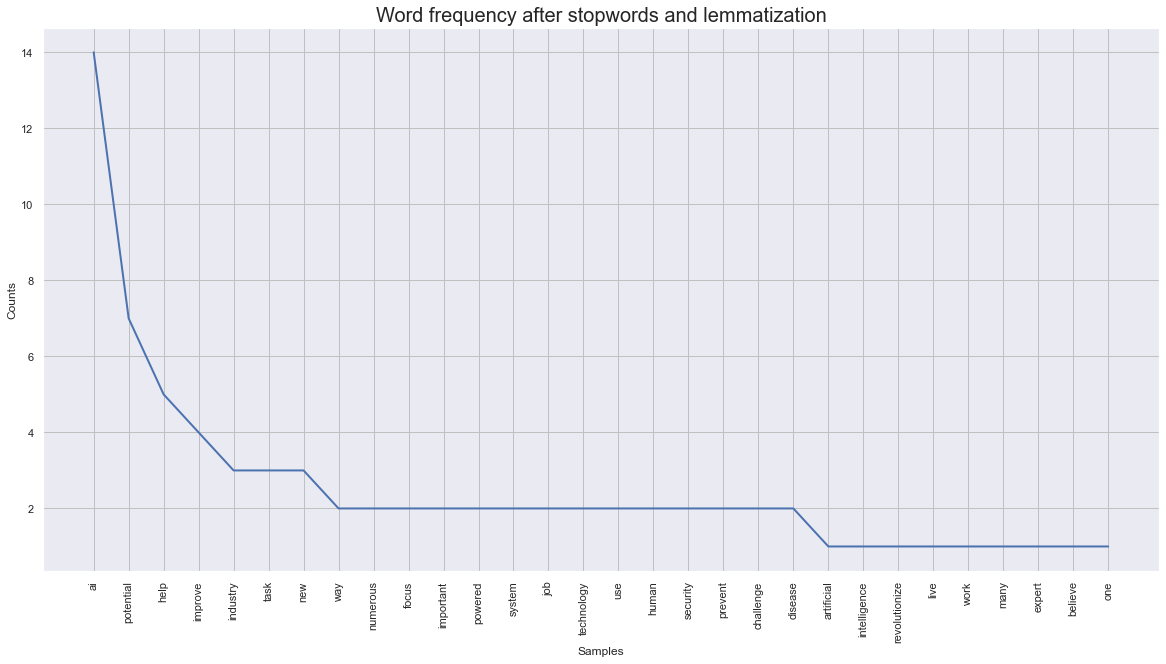

In [11]:
fdistl = FreqDist(lemmatized_tokens)

plt.subplots(figsize=(20,10))
plt.title('Word frequency after stopwords and lemmatization',fontsize=20)
fdistl.plot(30,cumulative=False)
plt.show()

In [12]:
ps = PorterStemmer()

stemmed_words=[]

for w in filtered_tokens:
    stemmed_words.append(ps.stem(w))
    
print('\033[1m',"Stemmed Text:",'\033[0m', stemmed_words)

 Stemmed Text:  ['artifici', 'intellig', 'ai', 'potenti', 'revolution', 'way', 'live', 'work', 'mani', 'expert', 'believ', 'one', 'signific', 'technolog', 'advanc', '21st', 'centuri', 'sever', 'reason', 'ai', 'view', 'posit', 'light', 'firstli', 'ai', 'potenti', 'improv', 'effici', 'product', 'numer', 'industri', 'autom', 'task', 'previous', 'done', 'manual', 'busi', 'save', 'time', 'resourc', 'allow', 'focu', 'import', 'task', 'exampl', 'healthcar', 'industri', 'ai', 'power', 'system', 'help', 'doctor', 'nurs', 'make', 'accur', 'diagnos', 'lead', 'better', 'patient', 'outcom', 'secondli', 'ai', 'potenti', 'creat', 'new', 'industri', 'job', 'opportun', 'ai', 'technolog', 'continu', 'advanc', 'new', 'product', 'servic', 'emerg', 'creat', 'job', 'develop', 'engin', 'profession', 'addit', 'use', 'ai', 'free', 'worker', 'focu', 'creativ', 'higher', 'level', 'task', 'requir', 'human', 'skill', 'judgment', 'thirdli', 'ai', 'potenti', 'improv', 'safeti', 'secur', 'variou', 'context', 'instanc

## Exercici 3

Realitza sentiment analysis al teu conjunt de dades.

In [13]:
# create preprocess_text function
def preprocess_text(text):

    # Tokenize the text

    tokens = word_tokenize(text.lower())
    #tokens = regexp_tokenize(text.lower(),"[\w']+")
    
    # Remove stop words

    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]

    # Lemmatize the tokens

    lemmatizer = WordNetLemmatizer()

    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

    # Join the tokens back into a string

    processed_text = ' '.join(lemmatized_tokens)
    
    return processed_text

# create get_sentiment function

def get_sentiment(text):

    scores = analyzer.polarity_scores(text)
    
    if scores['pos'] > scores['neg']:
        sentiment = 1   
    else:
        sentiment = -1
    return sentiment


In [14]:
# initialize NLTK sentiment analyzer

analyzer = SentimentIntensityAnalyzer()

pt = ' '.join(lemmatized_tokens)
scores = analyzer.polarity_scores(pt)
print('\33[1m','Polarity scores:','\33[0m',scores)

 Polarity scores:  {'neg': 0.048, 'neu': 0.611, 'pos': 0.341, 'compound': 0.9956}


In [15]:
# initialize NLTK sentiment analyzer

analyzer = SentimentIntensityAnalyzer()

pt=preprocess_text(text_IA)
print(pt)

scores = analyzer.polarity_scores(pt)
s=get_sentiment(pt)
if s==1:
    print('\n\33[1m','Positive text sentiment: 1','\n\33[0m')
else:
    print('\n\33[1m','Negative text sentiment: -1','\n\33[0m')
print('\n\33[1m','Polarity scores:','\33[0m',scores)


artificial intelligence ( ai ) potential revolutionize way live work , many expert believe one significant technological advancement 21st century . several reason ai viewed positive light . firstly , ai potential improve efficiency productivity numerous industry . automating task previously done manually , business save time resource , allowing focus important task . example , healthcare industry , ai-powered system help doctor nurse make accurate diagnosis , leading better patient outcome . secondly , ai potential create new industry job opportunity . ai technology continues advance , new product service emerge , creating job developer , engineer , professional . addition , use ai free worker focus creative higher-level task require human skill judgment . thirdly , ai potential improve safety security various context . instance , self-driving car equipped ai help prevent accident caused human error . ai-powered security system also help detect prevent crime public place , making city 

- Veiem que entre fer el word_tokenize o el regexp_tokenize no hi ha una diferència massa significativa en aquest cas.

#### Reviews extretes de: https://www.kaggle.com/datasets/cosmos98/twitter-and-reddit-sentimental-analysis-dataset?resource=download&select=Twitter_Data.csv

_Content: These tweets and Comments Were Made on Narendra Modi and Other Leaders as well as Peoples Opinion Towards the Next Prime Minister of The Nation ( In Context with General Elections Held In India - 2019)._

In [16]:
dfrr=pd.read_csv('Twitter_Data.csv', delimiter=',')
dfrr=dfrr.dropna()
dfrr

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
...,...,...
162975,why these 456 crores paid neerav modi not reco...,-1.0
162976,dear rss terrorist payal gawar what about modi...,-1.0
162977,did you cover her interaction forum where she ...,0.0
162978,there big project came into india modi dream p...,0.0


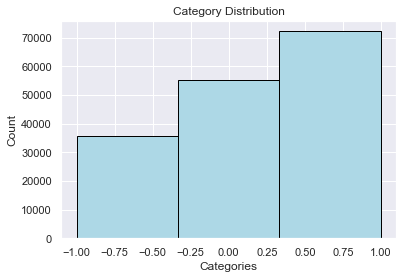

In [17]:
plt.hist(dfrr['category'], color='lightblue', edgecolor='black',bins=3)
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Category Distribution')
plt.show()

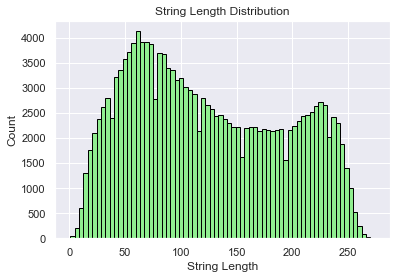

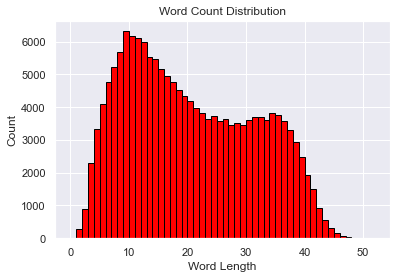

In [18]:
plt.hist(dfrr['clean_text'].str.len(), color='lightgreen', edgecolor='black', bins=70)
plt.xlabel('String Length')
plt.ylabel('Count')
plt.title('String Length Distribution')
plt.show()

plt.hist(dfrr['clean_text'].str.split().str.len(), color='red', edgecolor='black', bins=52)
plt.xlabel('Word Length')
plt.ylabel('Count')
plt.title('Word Count Distribution')
plt.show()

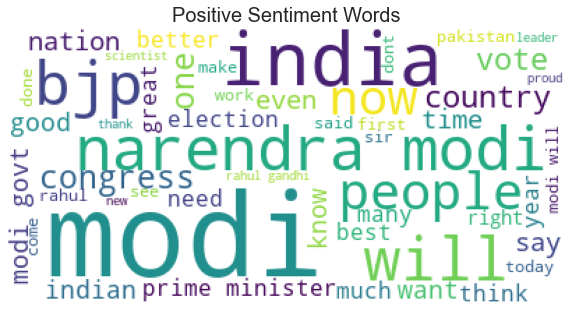

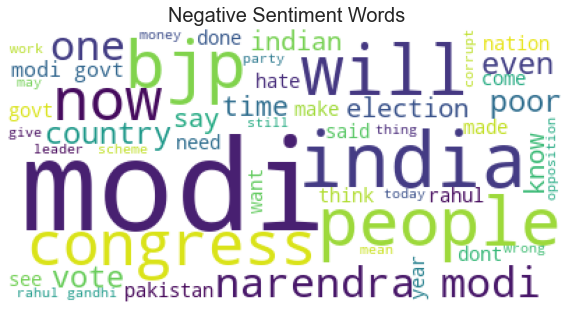

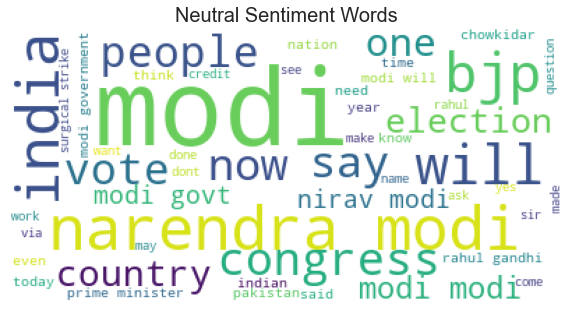

In [19]:
from wordcloud import WordCloud, STOPWORDS

def wordcount_gen(df, category):
    
    # Combine all tweets
    combined_tweets = " ".join([tweet for tweet in df[df.category==category]['clean_text']])
    
    # Initialize wordcloud object
    wc = WordCloud(background_color='white', 
                   max_words=50, 
                   stopwords = STOPWORDS)

    # Generate and plot wordcloud
    plt.figure(figsize=(10,10))
    plt.imshow(wc.generate(combined_tweets))
    if category==-1:
        plt.title('Negative Sentiment Words', fontsize=20)
    elif category==0:
        plt.title('Neutral Sentiment Words', fontsize=20)
    else:
        plt.title('Positive Sentiment Words', fontsize=20)
    plt.axis('off')
    plt.show()
    
# Positive tweet words
wordcount_gen(dfrr, 1)
     
# Negative tweet words
wordcount_gen(dfrr, -1)
     
# Neutral tweet words
wordcount_gen(dfrr, 0)

In [20]:
# apply the function df
dfr = dfrr.sample(n=8000,random_state=77)
dfr.info()
dfr=dfr.dropna()
dfr=dfr.loc[(dfr['category'] != 0)]
dfr['clean_text'] = dfr['clean_text'].apply(preprocess_text)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 108132 to 122247
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   clean_text  8000 non-null   object 
 1   category    8000 non-null   float64
dtypes: float64(1), object(1)
memory usage: 187.5+ KB


In [21]:
dfr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5282 entries, 108132 to 104385
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   clean_text  5282 non-null   object 
 1   category    5282 non-null   float64
dtypes: float64(1), object(1)
memory usage: 123.8+ KB


In [22]:
dfr.head()

,clean_text,category
108132,holy saint speaking modi pot calling kettle black,-1.0
18298,elect biggest world seen dance finger tip rahu...,1.0
24629,guilty shrinking economy undermined notebandi ...,-1.0
124412,interestingly englishspeaking polished bhakts ...,1.0
154709,basically sir appreciate hard work try everyth...,1.0


In [23]:
# create get_sentimentT function

def get_sentimentT(text):

    scores = analyzer.polarity_scores(text)
    
    if scores['pos'] > scores['neg']-0.05:
        sentiment = 1   
    else:
        sentiment = -1
    return sentiment

In [24]:
def scoresP(text):

    scores = analyzer.polarity_scores(text)
    P=scores['pos']
    return P

def scoresN(text):

    scores = analyzer.polarity_scores(text)
    N=scores['neg']
    return N

def scoresM(text):

    scores = analyzer.polarity_scores(text)
    M=scores['neu']
    return M


dfr['pos_coeff'] = dfr['clean_text'].apply(scoresP)
dfr['neg_coeff'] = dfr['clean_text'].apply(scoresN)
dfr['neu_coeff'] = dfr['clean_text'].apply(scoresM)

dfcl=dfr.drop('clean_text',axis=1)

In [25]:
# initialize NLTK sentiment analyzer

analyzer = SentimentIntensityAnalyzer()

# apply get_sentiment function

dfr['sentiment'] = dfr['clean_text'].apply(get_sentimentT)

dfr

,clean_text,category,pos_coeff,neg_coeff,neu_coeff,sentiment
108132,holy saint speaking modi pot calling kettle black,-1.0,0.000,0.000,1.000,1
18298,elect biggest world seen dance finger tip rahu...,1.0,0.000,0.263,0.737,-1
24629,guilty shrinking economy undermined notebandi ...,-1.0,0.000,0.363,0.637,-1
124412,interestingly englishspeaking polished bhakts ...,1.0,0.297,0.067,0.636,1
154709,basically sir appreciate hard work try everyth...,1.0,0.183,0.336,0.482,-1
...,...,...,...,...,...,...
143059,country billion population diverse state cant ...,1.0,0.063,0.397,0.539,-1
160790,rang badalna aap kaam siddu bjpthen changed co...,1.0,0.154,0.132,0.714,1
94799,guy anti modi name youth aawaz congress awaaz,1.0,0.000,0.247,0.753,-1
85845,poor guy keep searching google wikipedia googl...,-1.0,0.000,0.552,0.448,-1


In [26]:
print(confusion_matrix(dfr['category'], dfr['sentiment']))

[[ 922  792]
 [ 597 2971]]


In [27]:
print(classification_report(dfr['category'], dfr['sentiment']))

              precision    recall  f1-score   support

        -1.0       0.61      0.54      0.57      1714
         1.0       0.79      0.83      0.81      3568

    accuracy                           0.74      5282
   macro avg       0.70      0.69      0.69      5282
weighted avg       0.73      0.74      0.73      5282



- Podem veure que amb obtenim una _Accuracy_ del 74% pels nostres textos de Twitter usant que si s'obté un _positive score_ més gran que el _negative_ amb una petita correcció sigui considerat un text positiu. Caldria fer un anàlisis i preprocessament de les dades més exhastiu i focalitzat pel cas dels nostres Tweets per tal de millorar l'accuracy però depenent de l'ús que necessitem un 74% pot ser suficient si volem un anàlisis més qualitatiu.

A continuació veurem com a extra si tenint en compte el _neutral score_ amb un algoritme de classificació ML podem obtenir millores significatives en la classificació de textos.

In [28]:
import math
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [29]:
data = dfcl
X = data.iloc[:,1:]
y= data['category']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.2,random_state =123)

# Normalize the features
scaler = StandardScaler()
X_trainS = scaler.fit_transform(X_train)
X_testS = scaler.transform(X_test)

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 29/29 [00:05<00:00,  5.42it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NearestCentroid,0.70,0.71,0.71,0.71,0.02
BernoulliNB,0.75,0.69,0.69,0.74,0.02
GaussianNB,0.75,0.67,0.67,0.73,0.02
XGBClassifier,0.74,0.66,0.66,0.73,0.13
LogisticRegression,0.75,0.66,0.66,0.73,0.03
CalibratedClassifierCV,0.75,0.66,0.66,0.73,0.32
LinearDiscriminantAnalysis,0.75,0.66,0.66,0.73,0.02
SVC,0.75,0.66,0.66,0.73,0.88
LinearSVC,0.75,0.65,0.65,0.73,0.10


In [30]:
# Train the logistic regression model
lr2 = LogisticRegression()
lr2.fit(X_trainS, y_train)
lr_pred2 = lr2.predict(X_testS)
lr_acc2 = accuracy_score(y_test, lr_pred2)
print("Logistic regression accuracy:", lr_acc2)

Logistic regression accuracy: 0.7549668874172185


- Amb el model Logistic no sembla que poguem trobar un mètode de classificació significativament més precís a partir dels coefficients que obtenim del _Polarity score_.